<a href="https://colab.research.google.com/github/guiraposo/MLProjects/blob/main/Stock_Trend_RNN/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
#Import the training set and test set
data_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = data_train.iloc[:,1:2].values # Get the values in np array form.

In [10]:
#Feature scaling
#For RNNs it is recommended to use normalization for feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) #Fit and transform the training set


In [13]:
# Creating the a data structure with 60 timesteps (3 months).
# Initialization as an empty loop
X_train = []
y_train = []
for day in range(60, 1258):
  X_train.append(training_set_scaled[day-60:day, 0]) # Stocks on the 60 previous days
  y_train.append(training_set_scaled[day, 0]) # Stock value on the day + 1
X_train, y_train = np.array(X_train), np.array(y_train) # Convert to numpy arrays

In [17]:
# Reshaping the data. New dimension for predictors
# Will not be implemented here

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [19]:
# Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
# Set up the neural network architecture

#Initializating the RNN
regressor = Sequential()

# First LSTM layer and dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) # Check

# Second LSTM layer + Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2)) # Check
# Third LSTM layer + Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2)) # Check

# Fourth LSTM layer + Regularization
regressor.add(LSTM(units = 50, return_sequences = False)) #Last layer so no return
regressor.add(Dropout(0.2)) # Check

#Add output layer
regressor.add(Dense(units = 1))



In [24]:
# Compling the NN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [25]:
# Fit the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 101ms/step - loss: 0.0057
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0042
Epoch 3/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0038
Epoch 4/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0041
Epoch 5/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0037
Epoch 6/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0034
Epoch 7/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0040
Epoch 8/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0032
Epoch 9/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0033
Epoch 10/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0029
Epoch 13/100

In [26]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [28]:
dataset_total = pd.concat((data_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [29]:
# Creating the a data structure with 60 timesteps (3 months).
# Initialization as an empty loop
X_test = []
for day in range(60, 80):
  X_test.append(inputs[day-60:day, 0]) # Stocks on the 60 previous days
X_test = np.array(X_test)# Convert to numpy arrays
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))

In [30]:
predicted_stock_price = regressor.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [31]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

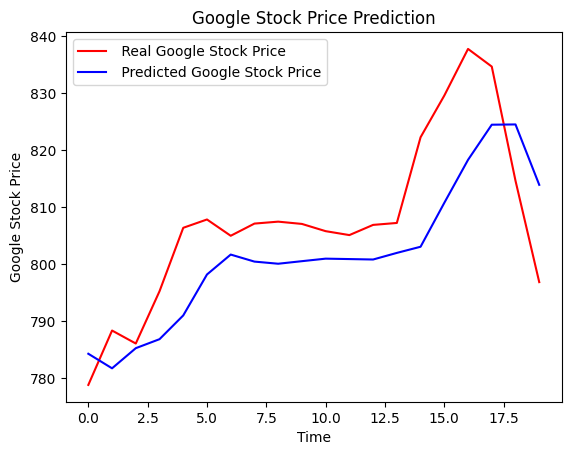

In [36]:
plt.plot(real_stock_price, color = 'red', label = ' Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = ' Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()